In [1]:
import pandas as pd
import numpy as np

# Modelo Recurrentes con Embeddings a nivel de caracter

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
project_path = "/content/drive/MyDrive/Areas/Going Pro/Diplo Deep Learning/final_nlp/"

In [4]:
df = pd.read_csv(project_path + 'data/acetylcholinesterase_02_bioactivity_data_preprocessed.csv')

In [ ]:
df.head()

,molecule_chembl_id,canonical_smiles,standard_value,standard_value_norm,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,750.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,100.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,50000.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,300.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,800.0,6.096910


# Canonical_smiles To secuence

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Utilizando Tokenizer y pad_sequences de keras a nivel de caracter, obtener la entrada tokenizada. Por ejemplo:

**El smiles**:

'C[C@@]12CC[C@H]3[C@]4(C)CCC[C@@]5(C)C(=O)OCC[N+](C)(C)CCCCCCCCC[N+](C)(C)CCOC(=O)[C@]6(C)CCC[C@]7(C)[C@@H]6CC[C@@]68C[C@@H](OC(=O)CCCCCCCCC(=O)O[C@@H]1C[C@@]3(CC[C@@H]45)C2)[C@@](C)(CC[C@@H]76)C8.[Br-].[Br-]'

**Tendría que quedar algo asi (puede que no sea exacto):**

array([ 2, 11,  2, 13, 13, 12,  5,  7,  2,  2, 11,  2, 13, 16, 12, 10, 11,
        2, 13, 12, 15,  3,  2,  4,  2,  2,  2, 11,  2, 13, 13, 12, 23,  3,
        2,  4,  2,  3,  9,  6,  4,  6,  2,  2, 11,  8, 21, 12,  3,  2,  4,
        3,  2,  4,  2,  2,  2,  2,  2,  2,  2,  2,  2, 11,  8, 21, 12,  3,
        2,  4,  3,  2,  4,  2,  2,  6,  2,  3,  9,  6,  4, 11,  2, 13, 12,
       30,  3,  2,  4,  2,  2,  2, 11,  2, 13, 12, 35,  3,  2,  4, 11,  2,
       13, 13, 16, 12, 30,  2,  2, 11,  2, 13, 13, 12, 30, 36,  2, 11,  2,
       13, 13, 16, 12,  3,  6,  2,  3,  9,  6,  4,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  3,  9,  6,  4,  6, 11,  2, 13, 13, 16, 12,  5,  2, 11,
        2, 13, 13, 12, 10,  3,  2,  2, 11,  2, 13, 13, 16, 12, 15, 23,  4,
        2,  7,  4, 11,  2, 13, 13, 12,  3,  2,  4,  3,  2,  2, 11,  2, 13,
       13, 16, 12, 35, 30,  4,  2, 36, 20, 11, 25, 26, 17, 12, 20, 11, 25,
       26, 17, 12], dtype=int32)
       

**Otro ejemplo:**
smiles: 'NC(=O)O'

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 8, 2, 3, 9, 6, 4, 6], dtype=int32)

**Tener en cuenta:**

- Ver cuanta es la máxima longitud para agregar el padding correspondiente
- En el ejemplo se agrego padding a la izquierda

In [16]:
max_len_idx = df['canonical_smiles'].apply(len).argmax()
min_len_idx = df['canonical_smiles'].apply(len).argmin()

In [19]:
X = df['canonical_smiles']
y = df['pIC50']

In [20]:
# Implementar tokenización y guardar en X_seq_pad el dataset tokenizado

In [36]:
#Instancio el tokenizer y lo entreno con X
# filters = '', ya que por defecto filtra caracteres
# lower = False, para que no convierta a minúscula
# char_level = True, para que tome los tokens a nivel de caracter
tokenizer = Tokenizer(filters='', lower=False, char_level=True)
tokenizer.fit_on_texts(X)

# Obtengo el índice de palabras del tokenizador
word_index = tokenizer.word_index

# Codifico oraciones de datos de entrenamiento en secuencias
X_seq = tokenizer.texts_to_sequences(X)

# Obtengo la longitud máxima de la secuencia de entrenamiento
maxlen = max([len(x) for x in X_seq])

# Relleno todas las secuencias para que tengan el largo máximo
pad_type = 'pre'
X_seq_pad = pad_sequences(X_seq, padding=pad_type, maxlen=maxlen)
X_seq_pad = np.array(X_seq_pad)

In [38]:
print(X[0])
print(X_seq_pad[0])

CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  2  2  6  1  5 13 13  3 17  1  7  1  1  1  1  3  6  2  1 10  1  1
  1  1  1 10  4  1  7  4  1  3  9  6  4 24  5]


Ahora todas las secuencias tienen la misma longitud (207)

In [39]:
from collections import Counter
Counter([len(x) for x in X_seq_pad])

Counter({207: 5663})

Resumen de resultados

In [40]:
print("Word index:\n", word_index)
print("\nPadded training sequences:\n", X_seq_pad)
print("\nPadded training shape:\n", X_seq_pad.shape)
print("Training sequences data type", type(X_seq))
print(" Padded training sequences data type", type(X_seq_pad))

Word index:
 {'c': 1, 'C': 2, '(': 3, ')': 4, '1': 5, 'O': 6, '2': 7, 'N': 8, '=': 9, '3': 10, '[': 11, ']': 12, 'n': 13, '@': 14, '4': 15, 'H': 16, '-': 17, '/': 18, 'l': 19, '.': 20, '+': 21, 'F': 22, '5': 23, 'o': 24, 'B': 25, 'r': 26, 'S': 27, '\\': 28, '#': 29, 's': 30, '6': 31, 'I': 32, 'e': 33, 'P': 34, '7': 35, '8': 36, 'i': 37, 'a': 38}

Padded training sequences:
 [[ 0  0  0 ...  4 24  5]
 [ 0  0  0 ...  2  2  5]
 [ 0  0  0 ...  1  1  5]
 ...
 [ 0  0  0 ...  5  6  2]
 [ 0  0  0 ...  1  5  6]
 [ 0  0  0 ...  7  9  6]]

Padded training shape:
 (5663, 207)
Training sequences data type <class 'list'>
 Padded training sequences data type <class 'numpy.ndarray'>


# Split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_seq_pad, y, test_size=0.2, random_state=42)

In [43]:
len(X_train), len(y_train), len(X_test)

(4530, 4530, 1133)

# Data Augmentation

In [44]:
# Anexo a X_train el mismo dataset, pero con los valores espejados
X_train = np.vstack([X_train, X_train[:,::-1]])
X_train.shape

(9060, 207)

In [45]:
y_train = np.hstack([y_train, y_train])
y_train.shape

(9060,)

# Network Model

In [47]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional, Dropout, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import backend as K

In [48]:
# Métrica

def R2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [49]:
# vocab_size = # Completar largo del vocabulario
vocab_size = len(word_index)
vocab_size

38

In [50]:
max_sequence_len = X_seq_pad.shape[1]
max_sequence_len

207

# Armar modelo en keras de LSTM
El de abajo es un ejemplo propuesto pero puede armar otro similar (siempre con LSTM o GRU)

In [51]:
"""
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
embedding (Embedding)        (None, 207, 64)           2496      
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               132000    
_________________________________________________________________
dense (Dense)                (None, 50)                10050     
_________________________________________________________________
batch_normalization (BatchNo (None, 50)                200       
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
=================================================================
Total params: 144,797
Trainable params: 144,697
Non-trainable params: 100
_________________________________________________________________
"""
pass

## Arquitectura general:
### Emb>Bi(LSTM)>Dense>Dropout>Activ(Relu)>Dense(1,linear)

In [56]:
# Defino funciones para crear modelos y probar con distintos hiperparámetros más rápido.
def create_model(cells, emb_size):
  return_sequences = False
  model = Sequential()
  model.add(Embedding(vocab_size+1, emb_size, input_length=max_sequence_len))
  model.add(Bidirectional(LSTM(cells, return_state=False, return_sequences=return_sequences, activation='tanh')))
  model.add(Dense(50, activation='linear'))
  model.add(Dropout(0.8))
  model.add(Activation('relu'))
  model.add(Dense(1, activation='linear'))
  print(model.summary())
  return model

def compile_train(model):
  model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mse', metrics=[R2])
  mcp = ModelCheckpoint(project_path + 'models/best_model_{epoch}', save_best_only=True, save_format="h5")
  history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), callbacks=[])
  return history, model

def score_model(model, X, y):
  y_pred = model.predict(X_test)
  r2 = 1 - ((y_test.values - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()
  print(f'R2: {r2}')
  return r2

def save_model(model, path):
  model.save(project_path + 'models/' + path + '.h5' )

## Emb(207,64)>Bi(LSTM(100, tanh))>Dense(50,linear)>Dropout(0.8)>Activ(Relu)>Dense(1,linear) = 0.6455026484384678

In [57]:
cells = 100
emb_size = 64
name = 'emb_64-bi_lstm_100_tanh-dense_50_linear-drop_80-activ_relu-dense_1'
model = create_model(cells, emb_size)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 207, 64)           2496      
                                                                 
 bidirectional_2 (Bidirectio  (None, 200)              132000    
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 50)                10050     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 activation_2 (Activation)   (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                      

In [58]:
history, model = compile_train(model)

Epoch 1/100
71/71 [==============================] - 6s 41ms/step - loss: 9.3069 - R2: -2.6238 - val_loss: 3.0595 - val_R2: -0.0344
Epoch 2/100
71/71 [==============================] - 2s 29ms/step - loss: 6.7538 - R2: -1.6559 - val_loss: 3.1259 - val_R2: -0.0583
Epoch 3/100
71/71 [==============================] - 3s 47ms/step - loss: 6.7920 - R2: -1.6588 - val_loss: 4.1716 - val_R2: -0.4201
Epoch 4/100
71/71 [==============================] - 4s 55ms/step - loss: 6.7191 - R2: -1.6560 - val_loss: 3.1129 - val_R2: -0.0553
Epoch 5/100
71/71 [==============================] - 2s 31ms/step - loss: 6.4474 - R2: -1.5389 - val_loss: 3.7528 - val_R2: -0.2760
Epoch 6/100
71/71 [==============================] - 2s 31ms/step - loss: 6.4861 - R2: -1.5297 - val_loss: 3.6765 - val_R2: -0.2512
Epoch 7/100
71/71 [==============================] - 2s 31ms/step - loss: 6.0889 - R2: -1.3848 - val_loss: 3.2796 - val_R2: -0.1146
Epoch 8/100
71/71 [==============================] - 2s 30ms/step - loss: 5.

In [59]:
r2 = score_model(model, X_test, y_test)

R2: 0.6516914095860176


In [60]:
save_model(model, name)

### Score

In [ ]:
r2
# 0.4984533246797399

0.6455026484384678

## Emb(207,16)>Bi(LSTM(100, tanh))>Dense(50,linear)>Dropout(0.8)>Activ(Relu)>Dense(1,linear) = 0.5868424617182542

In [62]:
cells = 100
emb_size = 16
name = 'emb_16-bi_lstm_100_tanh-dense_50_linear-drop_80-activ_relu-dense_1'
model = create_model(cells, emb_size)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 207, 16)           624       
                                                                 
 bidirectional_3 (Bidirectio  (None, 200)              93600     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 50)                10050     
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 activation_3 (Activation)   (None, 50)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                      

In [63]:
history, model = compile_train(model)

Epoch 1/100
71/71 [==============================] - 59s 36ms/step - loss: 10.0533 - R2: -3.0053 - val_loss: 3.8662 - val_R2: -0.3143
Epoch 2/100
71/71 [==============================] - 2s 25ms/step - loss: 7.6315 - R2: -2.0068 - val_loss: 3.5072 - val_R2: -0.1904
Epoch 3/100
71/71 [==============================] - 2s 25ms/step - loss: 7.6268 - R2: -1.9895 - val_loss: 3.3837 - val_R2: -0.1479
Epoch 4/100
71/71 [==============================] - 2s 25ms/step - loss: 7.4315 - R2: -1.9218 - val_loss: 3.4779 - val_R2: -0.1808
Epoch 5/100
71/71 [==============================] - 2s 25ms/step - loss: 7.2502 - R2: -1.8498 - val_loss: 2.9924 - val_R2: -0.0122
Epoch 6/100
71/71 [==============================] - 2s 26ms/step - loss: 7.2188 - R2: -1.8298 - val_loss: 3.8999 - val_R2: -0.3271
Epoch 7/100
71/71 [==============================] - 2s 26ms/step - loss: 7.0367 - R2: -1.7573 - val_loss: 3.1282 - val_R2: -0.0602
Epoch 8/100
71/71 [==============================] - 2s 25ms/step - loss: 

In [64]:
save_model(model, name)

### Score

In [65]:
r2 = score_model(model, X_test, y_test)

R2: 0.5868424617182542


##Emb(207,8)>Bi(LSTM(100, tanh))>Dense(50,linear)>Dropout(0.8)>Activ(Relu)>Dense(1,linear) = 0.35021891296197516

In [67]:
cells = 100
emb_size = 8
name = 'emb_8-bi_lstm_100_tanh-dense_50_linear-drop_80-activ_relu-dense_1'
model = create_model(cells, emb_size)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 207, 8)            312       
                                                                 
 bidirectional_4 (Bidirectio  (None, 200)              87200     
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 50)                10050     
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 activation_4 (Activation)   (None, 50)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                      

In [68]:
history, model = compile_train(model)

Epoch 1/100
71/71 [==============================] - 5s 36ms/step - loss: 11.0883 - R2: -3.3595 - val_loss: 3.7810 - val_R2: -0.2849
Epoch 2/100
71/71 [==============================] - 2s 25ms/step - loss: 8.0654 - R2: -2.1746 - val_loss: 4.3356 - val_R2: -0.4760
Epoch 3/100
71/71 [==============================] - 2s 25ms/step - loss: 8.1130 - R2: -2.1970 - val_loss: 3.9525 - val_R2: -0.3441
Epoch 4/100
71/71 [==============================] - 2s 25ms/step - loss: 7.7205 - R2: -2.0497 - val_loss: 3.5791 - val_R2: -0.2155
Epoch 5/100
71/71 [==============================] - 2s 25ms/step - loss: 7.5159 - R2: -1.9671 - val_loss: 4.2399 - val_R2: -0.4436
Epoch 6/100
71/71 [==============================] - 2s 25ms/step - loss: 7.5218 - R2: -1.9673 - val_loss: 3.4940 - val_R2: -0.1868
Epoch 7/100
71/71 [==============================] - 2s 25ms/step - loss: 7.4113 - R2: -1.8876 - val_loss: 4.2687 - val_R2: -0.4541
Epoch 8/100
71/71 [==============================] - 2s 25ms/step - loss: 7

In [69]:
save_model(model, name)

### Score

In [70]:
r2 = score_model(model, X_test, y_test)

R2: 0.35021891296197516


##Emb(207,32)>Bi(LSTM(100, tanh))>Dense(50,linear)>Dropout(0.8)>Activ(Relu)>Dense(1,linear) = 0.6021448739528423

In [72]:
cells = 100
emb_size = 32
name = 'emb_32-bi_lstm_100_tanh-dense_50_linear-drop_80-activ_relu-dense_1'
model = create_model(cells, emb_size)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 207, 32)           1248      
                                                                 
 bidirectional_6 (Bidirectio  (None, 200)              106400    
 nal)                                                            
                                                                 
 dense_12 (Dense)            (None, 50)                10050     
                                                                 
 dropout_6 (Dropout)         (None, 50)                0         
                                                                 
 activation_6 (Activation)   (None, 50)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                 51        
                                                      

In [73]:
history, model = compile_train(model)

Epoch 1/100
71/71 [==============================] - 6s 39ms/step - loss: 10.1404 - R2: -3.0030 - val_loss: 3.8885 - val_R2: -0.3220
Epoch 2/100
71/71 [==============================] - 2s 28ms/step - loss: 8.4780 - R2: -2.3392 - val_loss: 3.4994 - val_R2: -0.1879
Epoch 3/100
71/71 [==============================] - 2s 28ms/step - loss: 8.1034 - R2: -2.1681 - val_loss: 3.0417 - val_R2: -0.0291
Epoch 4/100
71/71 [==============================] - 2s 27ms/step - loss: 7.9358 - R2: -2.1395 - val_loss: 3.7359 - val_R2: -0.2704
Epoch 5/100
71/71 [==============================] - 2s 27ms/step - loss: 7.7644 - R2: -2.0335 - val_loss: 3.5454 - val_R2: -0.2046
Epoch 6/100
71/71 [==============================] - 2s 28ms/step - loss: 7.5982 - R2: -1.9914 - val_loss: 3.7628 - val_R2: -0.2801
Epoch 7/100
71/71 [==============================] - 2s 28ms/step - loss: 7.3485 - R2: -1.9024 - val_loss: 3.4673 - val_R2: -0.1785
Epoch 8/100
71/71 [==============================] - 2s 27ms/step - loss: 7

In [77]:
save_model(model, name)

### Score

In [75]:
r2 = score_model(model, X_test, y_test)

R2: 0.6021448739528423


## Variaciones alrededor del modelo que con tamaño de embedding que mejor performó

## Sin dropout:
## Emb(207,64)>Bi(LSTM(100, tanh))>Dense(50,linear)>Activ(Relu)>Dense(1,linear) = 0.6872219709640766

In [80]:
# Defino funciones para crear modelos y probar con distintos hiperparámetros más rápido.
def create_model(cells, emb_size):
  return_sequences = False
  model = Sequential()
  model.add(Embedding(vocab_size+1, emb_size, input_length=max_sequence_len))
  model.add(Bidirectional(LSTM(cells, return_state=False, return_sequences=return_sequences, activation='tanh')))
  model.add(Dense(50, activation='linear'))
  # model.add(Dropout(0.8))
  model.add(Activation('relu'))
  model.add(Dense(1, activation='linear'))
  print(model.summary())
  return model

In [81]:
cells = 100
emb_size = 64
name = 'emb_32-bi_lstm_100_tanh-dense_50_linear-activ_relu-dense_1'
create_model(cells, emb_size)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 207, 64)           2496      
                                                                 
 bidirectional_7 (Bidirectio  (None, 200)              132000    
 nal)                                                            
                                                                 
 dense_14 (Dense)            (None, 50)                10050     
                                                                 
 activation_7 (Activation)   (None, 50)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                 51        
                                                                 
Total params: 144,597
Trainable params: 144,597
Non-trainable params: 0
________________________________________________

In [82]:
history, model = compile_train(model)

Epoch 1/100
71/71 [==============================] - 7s 48ms/step - loss: 1.1582 - R2: 0.5523 - val_loss: 1.3120 - val_R2: 0.5557
Epoch 2/100
71/71 [==============================] - 2s 27ms/step - loss: 1.1324 - R2: 0.5595 - val_loss: 1.1442 - val_R2: 0.6122
Epoch 3/100
71/71 [==============================] - 2s 27ms/step - loss: 1.0772 - R2: 0.5820 - val_loss: 1.1598 - val_R2: 0.6066
Epoch 4/100
71/71 [==============================] - 3s 37ms/step - loss: 1.0767 - R2: 0.5813 - val_loss: 1.1040 - val_R2: 0.6269
Epoch 5/100
71/71 [==============================] - 2s 27ms/step - loss: 1.0537 - R2: 0.5941 - val_loss: 1.1152 - val_R2: 0.6231
Epoch 6/100
71/71 [==============================] - 2s 26ms/step - loss: 1.0689 - R2: 0.5867 - val_loss: 1.0961 - val_R2: 0.6288
Epoch 7/100
71/71 [==============================] - 2s 27ms/step - loss: 1.0354 - R2: 0.6009 - val_loss: 1.1176 - val_R2: 0.6181
Epoch 8/100
71/71 [==============================] - 2s 31ms/step - loss: 1.0731 - R2: 0.5

In [83]:
save_model(model, name)

### Score

In [84]:
r2 = score_model(model, X_test, y_test)

R2: 0.6872219709640766


# Load model (solo si se grabo el modelo)

¿Hasta que valores de r2 logró?

El valor de R2 máximo lo logré con la siguiente red:
- Emb(207,64)>Bi(LSTM(100, tanh))>Dense(50,linear)>Activ(Relu)>Dense(1,linear) = 0.6872219709640766

In [86]:
from tensorflow.keras.models import load_model

In [87]:
name = 'emb_32-bi_lstm_100_tanh-dense_50_linear-activ_relu-dense_1'

In [89]:
model_loaded = load_model(project_path + 'models/'+ name + '.h5', custom_objects={'R2': R2})

In [90]:
y_pred = model_loaded.predict(X_test)

In [91]:
r2 = 1 - ((y_test.values - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()
r2

0.6872219709640766

# Evaluación

<function matplotlib.pyplot.show(*args, **kw)>

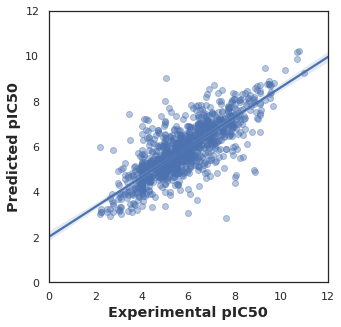

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show